<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:

1. Berikut adalah bagaimana algoritma KNN membantu kita dalam mengklasifikasikannya:

Pertama, tentukan jumlah nilai k neighbors. Penentuan jumlah k ini bergantung dari sebaran datanya, jika sebaran nya itu rapat dan dan memiliki data pencilan, maka pilih nilai k yang kecil. sedangkan jika sebaran datanya lebar, maka lebih baik pilih k yang besar. Secara default, jumlah k adalah 5.

Kedua, setelah kita tentukan nilai k = 5. Kita perlu menemukan 5 tetangga terdekat terhadap data point yang baru berdasarkan pada Euclidean distance. Kemudian, kita akan peroleh 5 titik yang terdekat terhadap data poin baru.

Ketiga, kita lakukan voting atau menghitung berapa jumlah terbanyak dari data poin tersebut yang dekat dengan data poin baru.

keempat, masukkan data poin baru ke label yang sudah kita hitung tetangga terbanyaknya. Berdasarkan diagram di atas, maka data poin baru akan masuk ke label category 1.


2. Kekurangan dari algoritma KNN:

    1. KNN perlu menentukan nilai dari parameter K (jumlah dari tetangga terdekat)

    2. Pembelajaran berdasarkan jarak tidak jelas mengenai jenis jarak apa yang harus digunakan dan atribut mana yang harus digunakan untuk mendapatkan hasil yang terbaik

    3. Biaya komputasi cukup tinggi karena diperlukan perhitungan jarak dari tiap sample uji pada keseluruhan sample latih



---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = np.arange(2,20)
train_score_list = []
test_score_list = []
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_score_list.append(accuracy_score(y_train, y_pred_train))
    
    test_score_list.append(accuracy_score(y_test, y_pred_test))
    

In [4]:
train_score_list

[0.9014084507042254,
 0.8661971830985915,
 0.7816901408450704,
 0.7535211267605634,
 0.7887323943661971,
 0.7535211267605634,
 0.7676056338028169,
 0.7535211267605634,
 0.7816901408450704,
 0.7605633802816901,
 0.7394366197183099,
 0.7323943661971831,
 0.7183098591549296,
 0.7323943661971831,
 0.7253521126760564,
 0.7394366197183099,
 0.7394366197183099,
 0.7394366197183099]

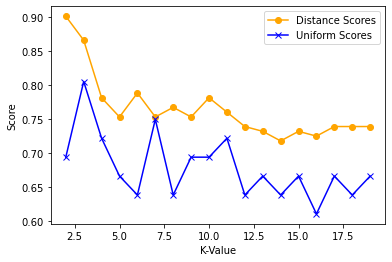

In [8]:
import matplotlib.pyplot as plt
plt.plot(k_range,train_score_list,marker='o', color='orange',label='Distance Scores')
plt.plot(k_range,test_score_list,marker='x', color='b',label='Uniform Scores')
plt.xlabel('K-Value')
plt.ylabel('Score')
plt.legend()
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])


x_train = X
y_train = y
lm = LinearRegression()
lm.fit(x_train,y_train) #fase training

print('Coefficient : ' + str(lm.coef_))
print('Intercept : ' + str(lm.intercept_))

Coefficient : [ 1.5 -5.   9.  10. ]
Intercept : 0.5000000016247412
